In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-09-11 15:49:09--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2024-09-11 15:49:09 (4.41 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
# Convert categorical columns into numeric
Categorical_columns = ["sex", "smoker", "region"]

for col in Categorical_columns:
  dataset[col] = dataset[col].astype('category').cat.codes

In [ ]:
# Seperate dataset into train and test data
train_dataset, test_dataset = np.split(dataset, [int(.8*len(dataset))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
# Pop 'expenses' column as label
train_labels, test_labels = train_dataset.pop('expenses'), test_dataset.pop('expenses')

In [ ]:
# Create normalized data layer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))

In [ ]:
normalizer

<Normalization name=normalization_1, built=True>

In [ ]:
# Create model
model = keras.Sequential([
                          normalizer,
                          layers.Dense(2),
                          layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1),
              loss='mae',
              metrics=['mae', 'mse'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (1070, 6)                   │              13 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

In [ ]:
# Train model
model.fit(train_dataset, train_labels, epochs=100, validation_split=0.2)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 12649.5527 - mae: 12649.5527 - mse: 292036640.0000 - val_loss: 13243.3926 - val_mae: 13243.3926 - val_mse: 313693088.0000
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12894.9092 - mae: 12894.9092 - mse: 309181056.0000 - val_loss: 13170.4004 - val_mae: 13170.4004 - val_mse: 311765024.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12931.3857 - mae: 12931.3857 - mse: 318023328.0000 - val_loss: 13029.0635 - val_mae: 13029.0635 - val_mse: 308152672.0000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12504.2324 - mae: 12504.2324 - mse: 300965152.0000 - val_loss: 12810.9990 - val_mae: 12810.9990 - val_mse: 302676224.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12656.7002 - mae: 12656.7002 - mse: 299664896.0000 - val_loss: 12512.2969 - val_mae: 12512.2969 - val_mse: 294993216.0000
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11960.1406 - mae: 11960.1406 - mse:

9/9 - 0s - 3ms/step - loss: 3473.1270 - mae: 3473.1270 - mse: 47643660.0000
Testing set Mean Abs Error: 3473.13 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


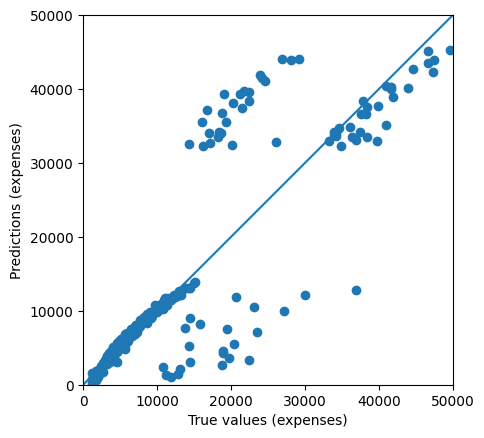

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
